In [1]:
!echo $PYTHONPATH
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

%load_ext autoreload
%autoreload 2

/home/dianloo/Desktop/tesi/quilt


In [2]:
from quilt.builder import NeuronCatalogue, SpikingNetwork

catalogue = NeuronCatalogue.from_yaml("tests/basal_ganglia_neurons.yaml")

Loaded model for neuron 'D1_neuron'

Loaded model for neuron 'D2_neuron'

Loaded model for neuron 'FSN_neuron'

Loaded model for neuron 'GPTi_neuron'

Loaded model for neuron 'GPTA_neuron'

Loaded model for neuron 'GPTI_neuron'

Loaded model for neuron 'STN_neuron'

In [3]:
sn = SpikingNetwork.from_yaml("tests/basal_ganglia_network.yaml", catalogue)

Populations are resized by 1.0

Population 0 infos:
	N:6000
	params:
		C_m	15.2
		E_exc	0
		E_inh	-74
		E_reset	-60
		E_rest	-78.2
		E_thr	-29.7
		I_e	0
		I_ext	0
		I_osc	0
		ada_a	-20
		ada_b	66.9
		ada_tau_w	100
		exp_threshold	40
		k	1
		neuron_type	1
		omega_I	0
		tau_e	12
		tau_i	10
		tau_m	10
		tau_refrac	0
Population 1 infos:
	N:6000
	params:
		C_m	15.2
		E_exc	0
		E_inh	-74
		E_reset	-60
		E_rest	-80
		E_thr	-29.7
		I_ext	0
		I_osc	0
		V_peak	40
		ada_a	-20
		ada_b	91
		ada_tau_w	100
		k	1
		neuron_type	1
		omega_I	0
		tau_e	12
		tau_i	10
		tau_m	10
		tau_refrac	0
Population 2 infos:
	N:420
	params:
		C_m	80
		E_exc	0
		E_inh	-74
		E_reset	-60
		E_rest	-80
		E_thr	-50
		I_ext	0
		I_osc	0
		V_b_aqif2_cond_exp	-55
		V_peak	25
		ada_a	0.025
		ada_b	0
		ada_tau_w	5
		k	1
		neuron_type	1
		omega_I	0
		tau_e	12
		tau_i	10
		tau_m	5
		tau_refrac	0
Population 3 infos:
	N:780
	params:
		C_m	40
		Delta	1.7
		E_exc	0
		E_inh	-65
		E_reset	-60
		E_rest	-55.1
		E_thr	-54.7
		I_e	12
		I_ext	0
		I_osc	0
		ada_a	2.5
		ada_b	

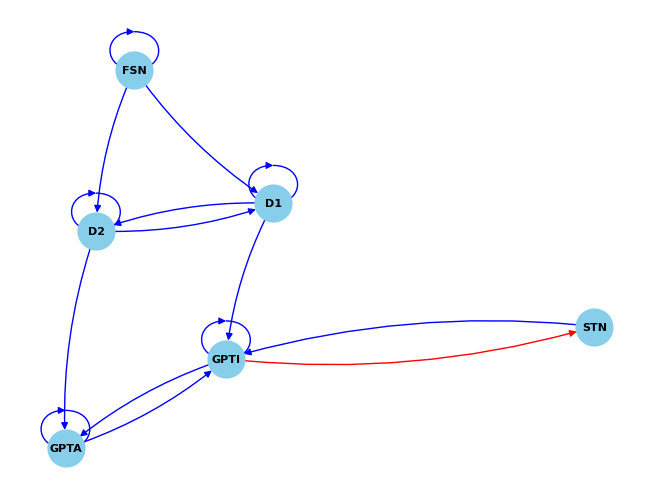

In [4]:
from quilt.view import plot_graph
plot_graph(sn)

In [5]:
pop_state_monitorized = "GPTI"
for population in sn.populations.values():
    population.monitorize_spikes()
sn.populations[pop_state_monitorized].monitorize_states()

In [6]:
for pop in sn.populations.values():
    pop.add_injector(50, 0, 200)

sn.populations["D1"].add_injector(500,  # pA
                                  0,   # ms
                                  100   # ms
                                 )
sn.populations["D2"].add_injector(500,  # pA
                                  0,   # ms
                                  100   # ms
                                 )

In [7]:
sn.run(dt=0.1, time=400)

Minimum synaptic delay is 1
Running network consisting of 13868 neurons for 4000 timesteps

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Simulation took 11 s	(2.809 ms/step)
	Gathering time avg: 69.0015 us/step
	Inject time avg: 0.01125 us/step


In [8]:
spikes = dict()
for pop in sn.populations.keys():
    spikes[pop] = sn.populations[pop].get_data()['spikes']

states = sn.populations[pop_state_monitorized].get_data()['states']

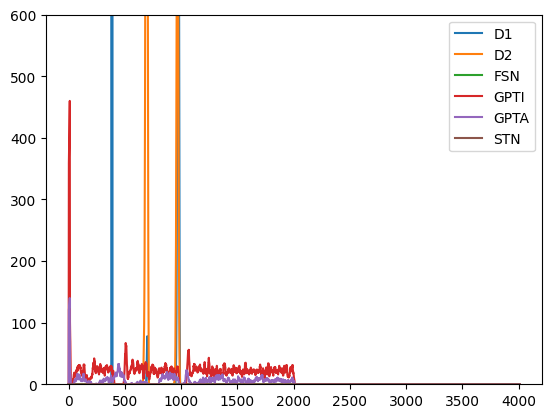

In [11]:
for pop in spikes.keys():
    N = 10
    
    plt.plot(np.convolve(spikes[pop], np.ones(N)), label=pop)
plt.ylim(0,600)
plt.legend()